<a href="https://colab.research.google.com/github/avladova/Student-performance-prediction/blob/main/Large_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import MissingIndicator
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LinearRegression
from sklearn.cluster import DBSCAN

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score, roc_auc_score
from scipy import stats

import plotly.express as px
from itertools import combinations
#%pylab inline

In [18]:
url = 'https://raw.githubusercontent.com/avladova/Student-performance-prediction/main/merged.csv'
merged = pd.read_csv(url)
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Пол                 84 non-null     object 
 1   Группа              84 non-null     int64  
 2   ДЗ 1                84 non-null     float64
 3   Программирование 1  50 non-null     float64
 4   Активность 1        84 non-null     float64
 5   Контрольная 1       84 non-null     float64
 6   Проект 1            84 non-null     float64
 7   Доп.задание 1       50 non-null     float64
 8   Аттестация 1        84 non-null     int64  
 9   ДЗ 2                50 non-null     float64
 10  Программирование 2  50 non-null     float64
 11  Активность 2        84 non-null     float64
 12  Контрольная 2       84 non-null     int64  
 13  Доп.задание 2       84 non-null     int64  
 14  ДЗ вне срока        50 non-null     float64
 15  Аттестация 2        84 non-null     int64  
 16  Экзамен   

In [19]:
merged.fillna(0, inplace=True)
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Пол                 84 non-null     object 
 1   Группа              84 non-null     int64  
 2   ДЗ 1                84 non-null     float64
 3   Программирование 1  84 non-null     float64
 4   Активность 1        84 non-null     float64
 5   Контрольная 1       84 non-null     float64
 6   Проект 1            84 non-null     float64
 7   Доп.задание 1       84 non-null     float64
 8   Аттестация 1        84 non-null     int64  
 9   ДЗ 2                84 non-null     float64
 10  Программирование 2  84 non-null     float64
 11  Активность 2        84 non-null     float64
 12  Контрольная 2       84 non-null     int64  
 13  Доп.задание 2       84 non-null     int64  
 14  ДЗ вне срока        84 non-null     float64
 15  Аттестация 2        84 non-null     int64  
 16  Экзамен   

## Пропуски и нули

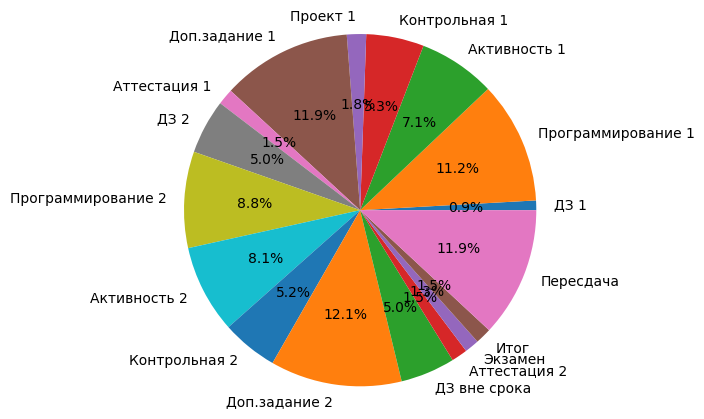

In [20]:
quantitative_data = merged.select_dtypes(include=['int64', 'float64'])
if 'Группа' in quantitative_data.columns:
    quantitative_data.drop('Группа', axis=1, inplace=True)
zero_counts = (quantitative_data == 0).sum()

# Prepare data for the combined pie chart
labels = zero_counts.index.tolist()
sizes = zero_counts.values

plt.figure(figsize=(5, 5))  # Adjust the figure size as needed

# Create the combined pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Ensure the pie chart is drawn as a circle

# Display the combined pie chart
plt.show()

## Быстрый взгляд на данные

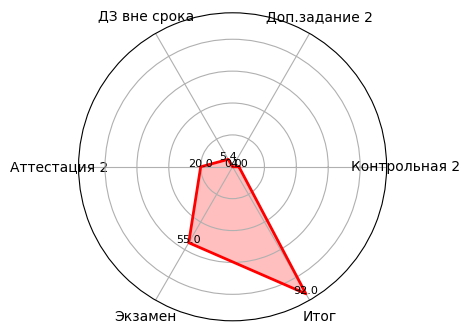

In [21]:
# Assuming 'merged' is the variable containing your dataset
quantitative_data = merged.select_dtypes(include=['int64', 'float64'])

# Exclude the 'Group' feature from the quantitative columns if present
if 'Группа' in quantitative_data.columns:
    quantitative_data.drop('Группа', axis=1, inplace=True)

# Calculating statistics for the radar chart
stats = quantitative_data.iloc[0].values[10:16]

# Defining the names of the quantitative features
labels = quantitative_data.columns.tolist()[10:16]

# Repeating the first feature to close the circle
stats = np.concatenate((stats, [stats[0]]))

# Creating angles for the radar chart
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# Creating the radar chart
fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))
ax.fill(angles, stats, color='red', alpha=0.25)
ax.plot(angles, stats, color='red', linewidth=2)

# Removing the y-axis labels
ax.set_yticklabels([])

# Adding scores to the radar chart
for i in range(len(stats) - 1):
    ax.text(angles[i], stats[i], str(stats[i]), color='black', fontsize=8, ha='center')

# Setting the labels for each spoke
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Displaying the radar chart
plt.show()

## Распределения

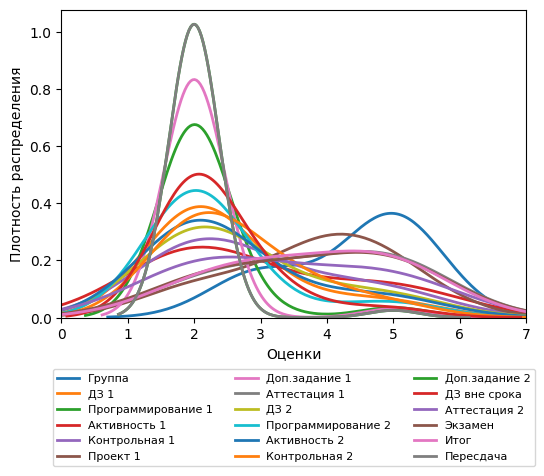

In [22]:
quantitative_data = merged.select_dtypes(include=['int64', 'float64'])
cols = quantitative_data.columns
quantitative_data[cols] = quantitative_data[cols].apply(lambda x: x / np.max(x))
# Create a new figure
plt.figure(figsize=(6, 4))

for col in cols:
    new_col_name = col + '_score'
    quantitative_data[new_col_name] = pd.cut(quantitative_data[col], bins=[-0.5, 0.5, 0.7, 0.8, 1.0], labels=[2, 3, 4, 5]).astype(int)
    sns.kdeplot(data=quantitative_data, x=new_col_name, bw_adjust=2, label=col, linewidth=2)  # Plot all distributions on the same plot

plt.xlim(0, 7)  # Set the lower limit of the x-axis to 0
plt.legend(loc='lower center', ncols=3, fontsize=8, bbox_to_anchor=(0.5, -0.5))
plt.xlabel('Оценки')
plt.ylabel('Плотность распределения')
plt.show()

cols=['Аттестация 1','Аттестация 2']
for col in cols:
    new_col_name = col + '_score'
    quantitative_data[new_col_name] = pd.cut(quantitative_data[col], bins=[-0.5, 0.5, 0.7, 0.8, 1.0], labels=[2, 3, 4, 5]).astype(int)

# Увеличение пространства признаков

In [23]:
dfrm=merged.copy()
dfrm.set_index(['Индекс','Группа'],inplace=True)
dfrm = pd.get_dummies(dfrm, columns=['Пол'], prefix=['Пол'], drop_first=True)
dfrm.head(2)

,,ДЗ 1,Программирование 1,Активность 1,Контрольная 1,Проект 1,Доп.задание 1,Аттестация 1,ДЗ 2,Программирование 2,Активность 2,Контрольная 2,Доп.задание 2,ДЗ вне срока,Аттестация 2,Экзамен,Итог,Пересдача,Пол_m
Индекс,Группа,,,,,,,,,,,,,,,,,,
ВДm5,5,13.5,0.0,2.0,4.5,4.0,0.0,17,12.65,3.0,3.0,4,0,5.400,20,55,92,0.0,1
ВКf5,5,10.0,0.0,0.0,0.0,0.0,0.0,8,10.20,0.0,0.0,4,0,3.285,12,60,80,0.0,0


In [24]:
scaler = MinMaxScaler()
dfrm_normalized_values = scaler.fit_transform(dfrm)
dfrm_normalized = pd.DataFrame(dfrm_normalized_values, columns=dfrm.columns, index=dfrm.index)
dfrm_normalized.head(2)

,,ДЗ 1,Программирование 1,Активность 1,Контрольная 1,Проект 1,Доп.задание 1,Аттестация 1,ДЗ 2,Программирование 2,Активность 2,Контрольная 2,Доп.задание 2,ДЗ вне срока,Аттестация 2,Экзамен,Итог,Пересдача,Пол_m
Индекс,Группа,,,,,,,,,,,,,,,,,,
ВДm5,5,0.495413,0.0,0.4,0.9,0.8,0.0,0.85,0.951128,0.6,0.6,0.8,0.0,0.461538,0.909091,0.916667,0.92,0.0,1.0
ВКf5,5,0.366972,0.0,0.0,0.0,0.0,0.0,0.40,0.766917,0.0,0.0,0.8,0.0,0.280769,0.545455,1.000000,0.80,0.0,0.0


In [25]:
columns = ['ДЗ', 'Программирование', 'Активность', 'Контрольная', 'Доп.задание', 'Аттестация']

for column in columns:
    dfrm_normalized[f'{column}_прогресс'] = dfrm_normalized[f'{column} 2'] - dfrm_normalized[f'{column} 1']

dfrm_normalized[['ДЗ_прогресс','Программирование_прогресс','Активность_прогресс','Контрольная_прогресс','Доп.задание_прогресс','Аттестация_прогресс']].head(2)

,,ДЗ_прогресс,Программирование_прогресс,Активность_прогресс,Контрольная_прогресс,Доп.задание_прогресс,Аттестация_прогресс
Индекс,Группа,,,,,,
ВДm5,5,0.455715,0.6,0.2,-0.1,0.0,0.059091
ВКf5,5,0.399945,0.0,0.0,0.8,0.0,0.145455


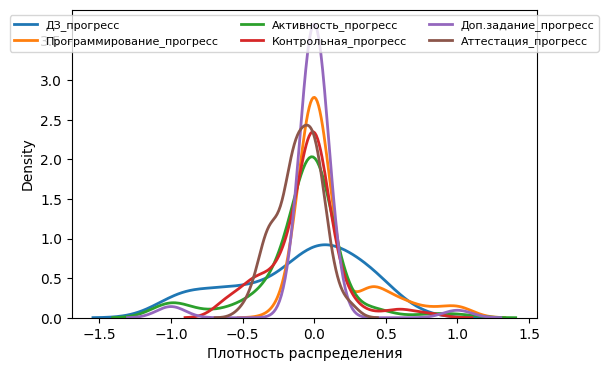

In [26]:
progress_features = dfrm_normalized.filter(like='_прогресс')
# Create a new figure
plt.figure(figsize=(6, 4))

for col in progress_features.columns.tolist():
    sns.kdeplot(data=dfrm_normalized, x=col, label=col, linewidth=2)  # Plot all distributions on the same plot

plt.legend(loc='upper center', ncols=3, fontsize=8)
plt.xlabel('Нормализованные оценки')
plt.xlabel('Плотность распределения')
plt.show()


# Классификация LDA сдаст - не сдаст

In [27]:
dfrm_normalized.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 84 entries, ('ВДm5', 5) to ('ЧКf6', 6)
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ДЗ 1                       84 non-null     float64
 1   Программирование 1         84 non-null     float64
 2   Активность 1               84 non-null     float64
 3   Контрольная 1              84 non-null     float64
 4   Проект 1                   84 non-null     float64
 5   Доп.задание 1              84 non-null     float64
 6   Аттестация 1               84 non-null     float64
 7   ДЗ 2                       84 non-null     float64
 8   Программирование 2         84 non-null     float64
 9   Активность 2               84 non-null     float64
 10  Контрольная 2              84 non-null     float64
 11  Доп.задание 2              84 non-null     float64
 12  ДЗ вне срока               84 non-null     float64
 13  Аттестация 2               84 non

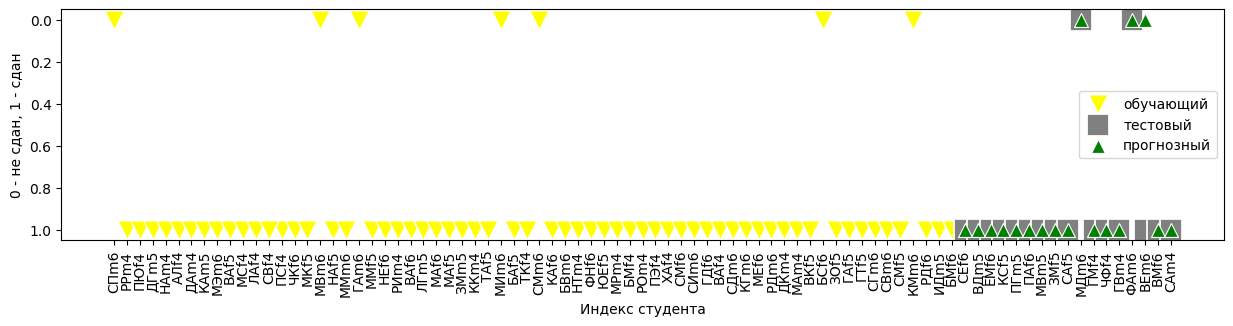

Accuracy: 0.9411764705882353
Precision: 1.0
Recall: 0.9333333333333333
F1 Score: 0.9655172413793104
Confusion Matrix:
[[ 2  0]
 [ 1 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.93      0.97        15

    accuracy                           0.94        17
   macro avg       0.83      0.97      0.88        17
weighted avg       0.96      0.94      0.95        17



In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define features and target variable
cols = ['Sex_m', 'Group', 'Campus work_diff', 'Programming skills_diff', 'Activity_diff', 'Test_diff', 'Bonus task_diff', 'Attestation_diff']
progress_features = dfrm_normalized.filter(like='_прогресс')
X = dfrm_normalized[progress_features.columns.tolist()]
y = (dfrm_normalized['Экзамен'] > 0.0).astype(int)  # Assuming passing the exam is the target event

cols = ['Пол_m', 'ДЗ 1', 'Активность 1', 'Активность 2', 'Контрольная 2', 'Аттестация 1', 'Аттестация 2']
X = dfrm_normalized[cols]
y = (dfrm_normalized['Экзамен'] > 0.0).astype(int)  # Assuming passing the exam is the target event

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Discriminant Analysis model
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Adjusting and adding parameters for the scatter plot to change its appearance
plt.figure(figsize=(15, 3))
stud_test = X_test.index.get_level_values('Индекс').astype(str)
stud_train = X_train.index.get_level_values('Индекс').astype(str)
sns.scatterplot(x=stud_train, y=y_train, s=200, color='yellow', label='обучающий', marker='v')  # Increased marker size and changed marker type to circles
g = sns.scatterplot(x=stud_test, y=y_test, s=250, color='grey', label='тестовый', marker='s')  # Increased marker size and changed marker type to squares
g = sns.scatterplot(x=stud_test, y=y_pred, s=100, color='green', label='прогнозный', marker='^')  # Changed marker type to triangles
plt.gca().invert_yaxis()  # Flip the y-axis
plt.xlabel('Индекс студента')
plt.ylabel('0 - не сдан, 1 - сдан')
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis tick labels
plt.show()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)  # Set zero_division parameter to 1 to avoid warnings
recall = recall_score(y_test, y_pred, zero_division=1)  # Set zero_division parameter to 1 to avoid warnings
f1 = f1_score(y_test, y_pred, zero_division=1)  # Set zero_division parameter to 1 to avoid warnings

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

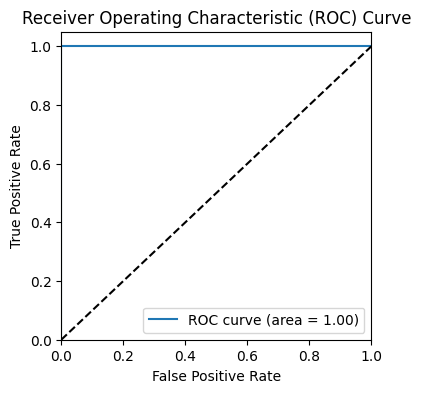

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

# Plot ROC curve
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [30]:
# Assuming you have feature_names and feature_importance obtained from your analysis
feature_importance = abs(model.coef_)
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance[0]})

# Sort the DataFrame by Importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance DataFrame
print(feature_importance_df)

         Feature  Importance
5   Аттестация 1   10.134220
1           ДЗ 1    8.808169
3   Активность 2    5.252004
4  Контрольная 2    5.243992
2   Активность 1    3.067116
0          Пол_m    0.881955
6   Аттестация 2    0.509522


# Прогноз оценки по тренду

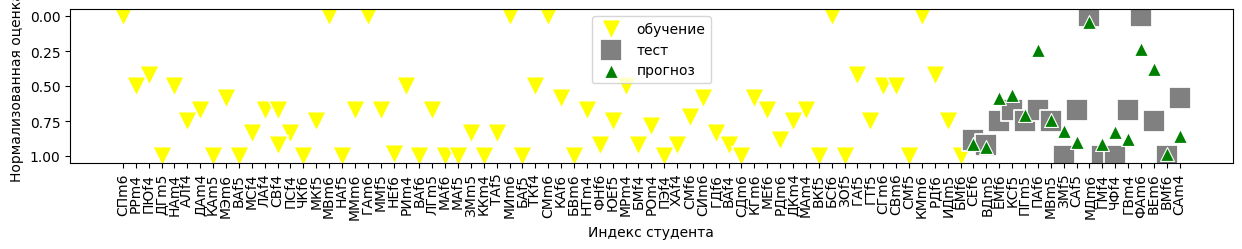

Mean Absolute Error: 0.1539300521089544
Mean Squared Error: 0.03884603532996617
Root Mean Squared Error: 0.197093975884516
R squared: 0.5437101727674396
model coefficients: [-0.05700545  0.87918614  0.19738342  0.07233016 -0.00589666  0.19056364
 -0.20342254  0.12666591  0.18991115  0.12281589  0.13465949]


In [31]:
cols=['ДЗ_прогресс','Программирование_прогресс','Активность_прогресс','Контрольная_прогресс','Доп.задание_прогресс','Аттестация_прогресс', 'Пол_m',]
cols = ['Пол_m', 'ДЗ 1','ДЗ 2', 'Активность 1', 'Активность 2', 'Контрольная 2', 'Аттестация 1', 'Аттестация 2', 'Проект 1', 'Доп.задание 1', 'Доп.задание 2']
X=dfrm_normalized[cols]
y=dfrm_normalized['Экзамен']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)

# Прогнозы на тестовой выборке
y_pred = modelLR.predict(X_test)

# Построение графика результатов классификации с индексами студентов
plt.figure(figsize=(15, 2))
stud_test = X_test.index.droplevel(1)

stud_train= X_train.index.droplevel(1)
sns.scatterplot(x=stud_train, y=y_train, s=200, color='yellow', label='обучение', marker='v')

g=sns.scatterplot(x=stud_test, y=y_test, s=250, color='grey', label='тест', marker='s')  # Используем идентификаторы студентов вместо числовых значений на оси x
g= sns.scatterplot(x=stud_test, y=y_pred, s=100, color='green', label='прогноз', marker='^')  # Используем идентификаторы студентов вместо числовых значений на оси x

# Flip the y-axis
plt.gca().invert_yaxis()

plt.xlabel('Индекс студента')
plt.ylabel('Нормализованная оценка')
plt.legend()
plt.xticks(rotation=90)  # Rotate x-axis tick labels
plt.show()

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error
rmse = np.sqrt(mse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R squared: {r_squared}')

print(f'model coefficients: {modelLR.coef_}')

In [32]:
# Assuming you have feature_names and feature_importance obtained from your analysis
feature_importance = abs(modelLR.coef_)
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance[0]})

# Sort the DataFrame by Importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance DataFrame
print(feature_importance_df)

          Feature  Importance
0           Пол_m    0.057005
1            ДЗ 1    0.057005
2            ДЗ 2    0.057005
3    Активность 1    0.057005
4    Активность 2    0.057005
5   Контрольная 2    0.057005
6    Аттестация 1    0.057005
7    Аттестация 2    0.057005
8        Проект 1    0.057005
9   Доп.задание 1    0.057005
10  Доп.задание 2    0.057005


# Индивидуальная траектория

In [33]:
melted = pd.melt(dfrm_normalized.reset_index(), id_vars=['Индекс','Группа'], value_vars=['ДЗ 1', 'Проект 1', 'Контрольная 1', 'ДЗ 2', 'Контрольная 2', 'Экзамен'])
melted.sample(4)

,Индекс,Группа,variable,value
172,САf5,5,Контрольная 1,1.000000
394,ЕМf6,6,Контрольная 2,0.000000
44,ПСf4,4,ДЗ 1,0.422018
302,БВm6,6,ДЗ 2,0.000000


In [34]:
replacements = {
   'variable': {
      r'(ДЗ 1)': '1',
      r'(Проект 1)': '2',
      r'(Контрольная 1)': '3',
      r'(ДЗ 2)': '4',
      r'(Контрольная 2)': '5',
      r'(Экзамен)': '6'

}
}
melted.replace(replacements, regex=True, inplace=True)
melted["variable"] = melted["variable"].astype('float')
melted.rename(columns={'variable': 'Модельное время', 'value': 'Оценка'} , inplace=True)
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Индекс           504 non-null    object 
 1   Группа           504 non-null    int64  
 2   Модельное время  504 non-null    float64
 3   Оценка           504 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


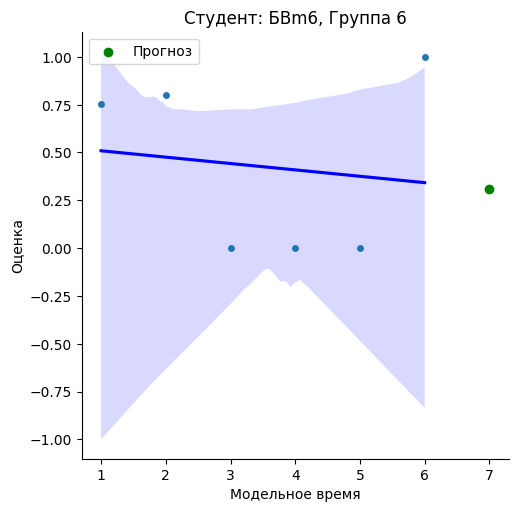

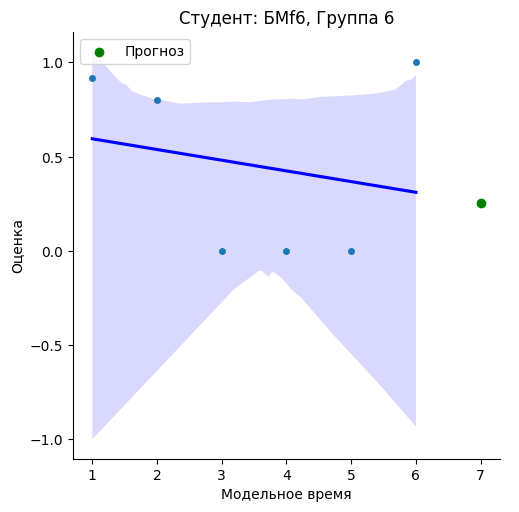

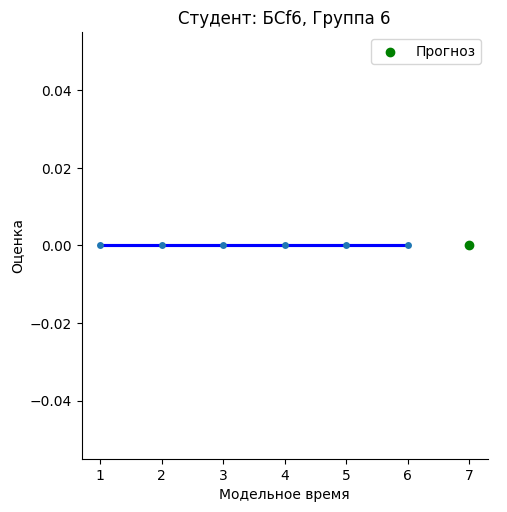

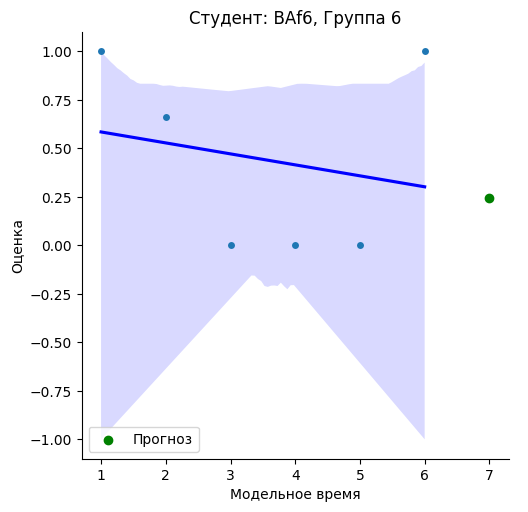

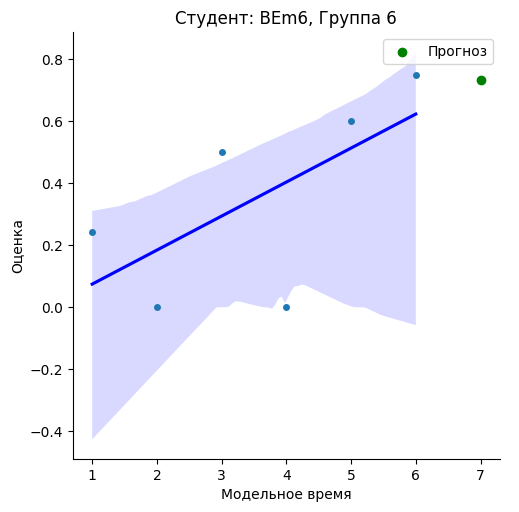

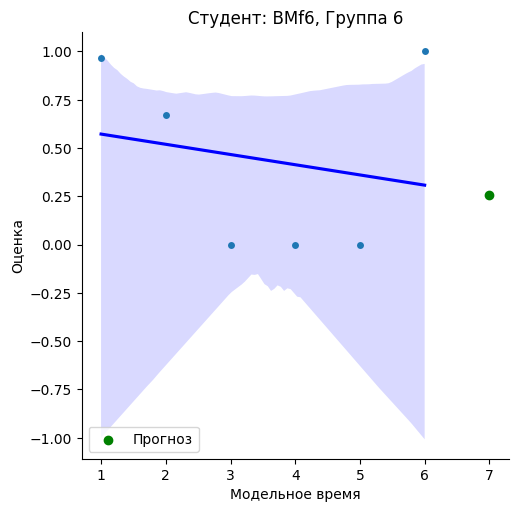

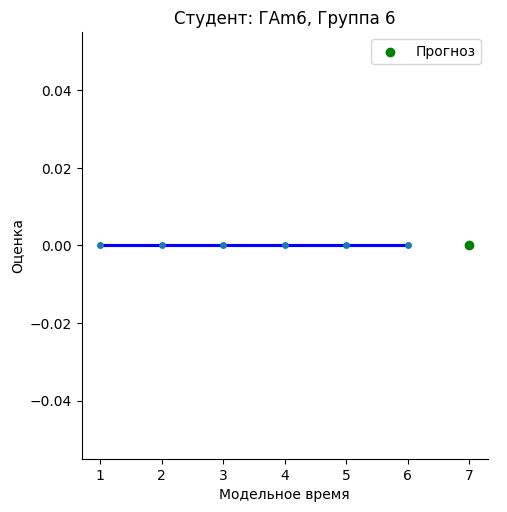

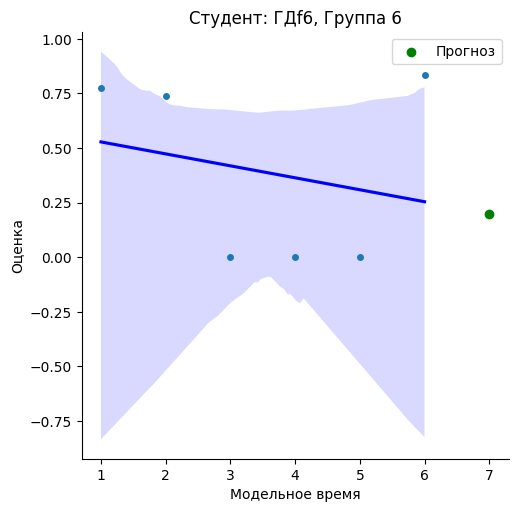

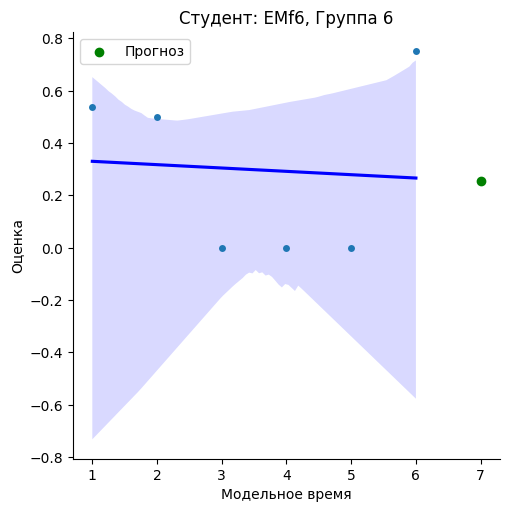

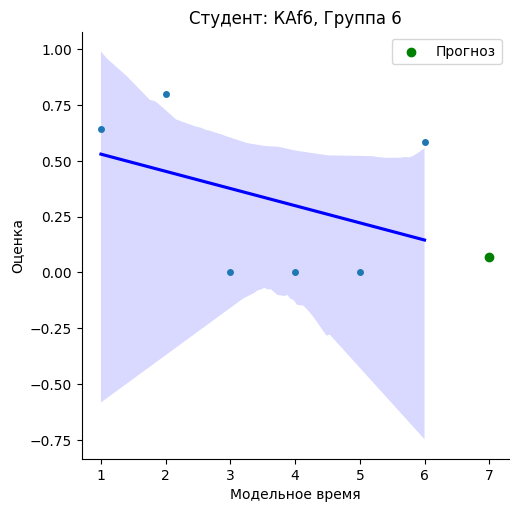

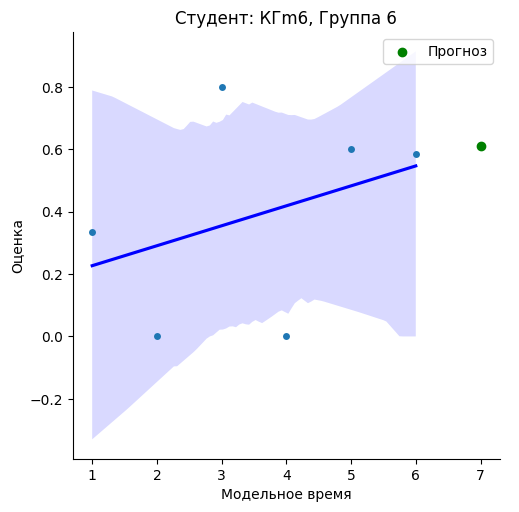

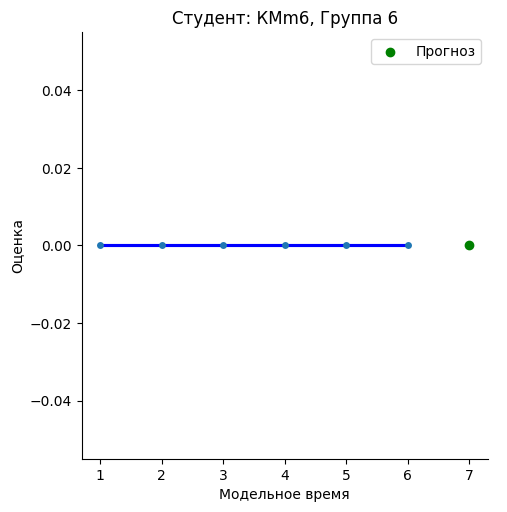

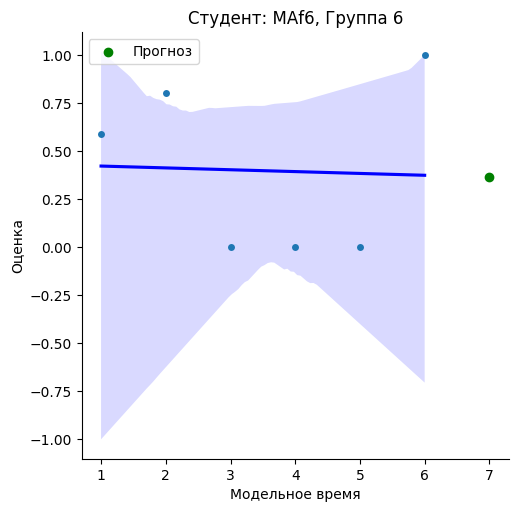

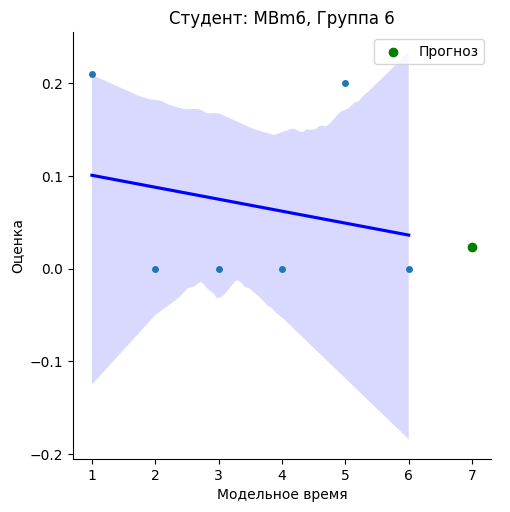

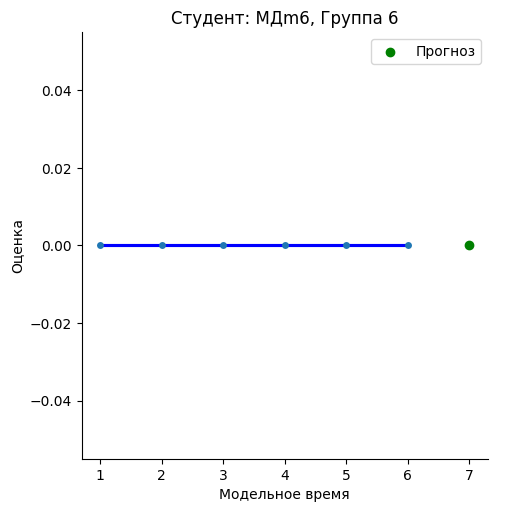

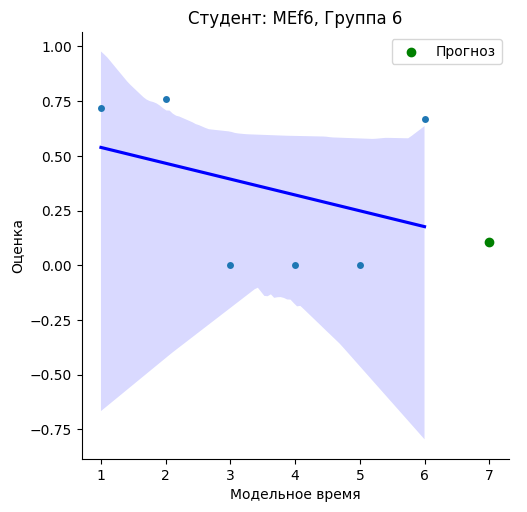

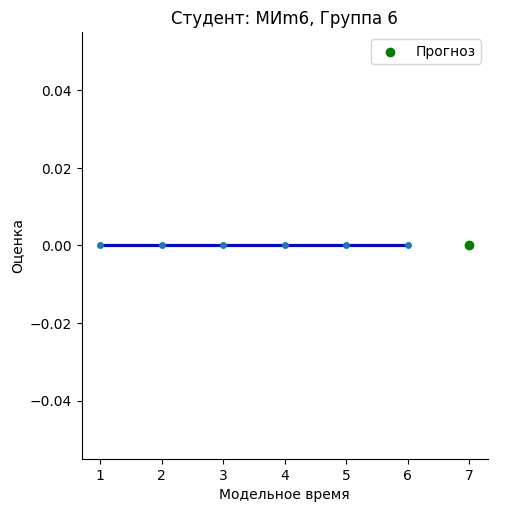

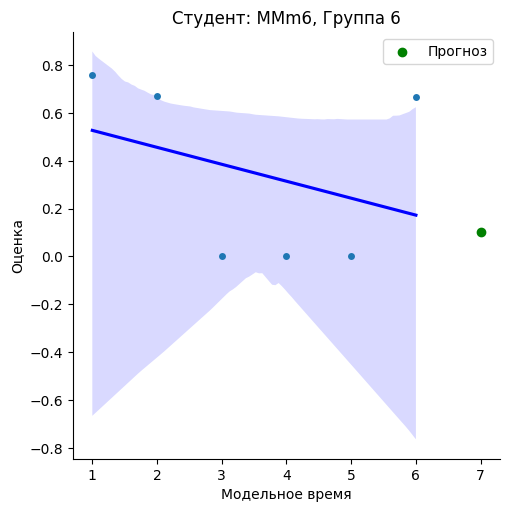

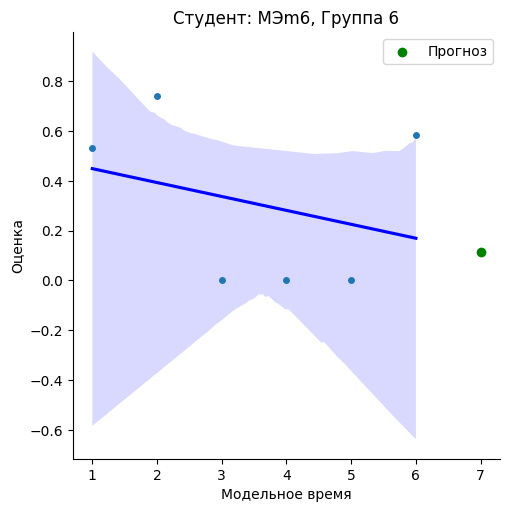

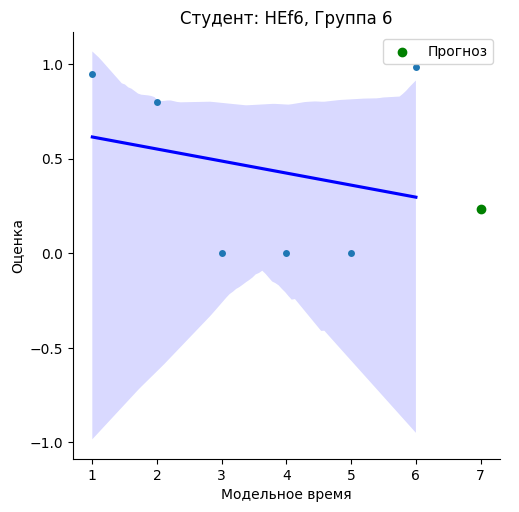

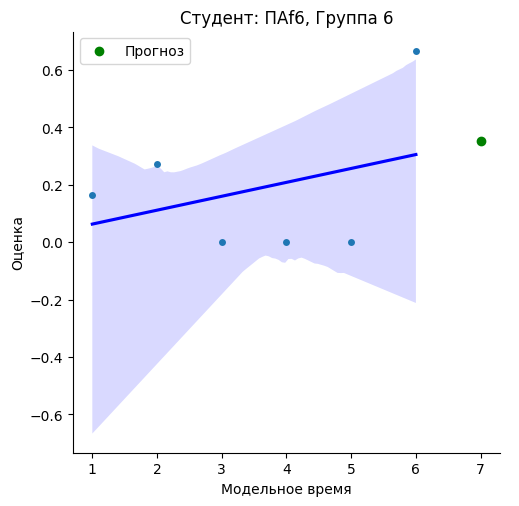

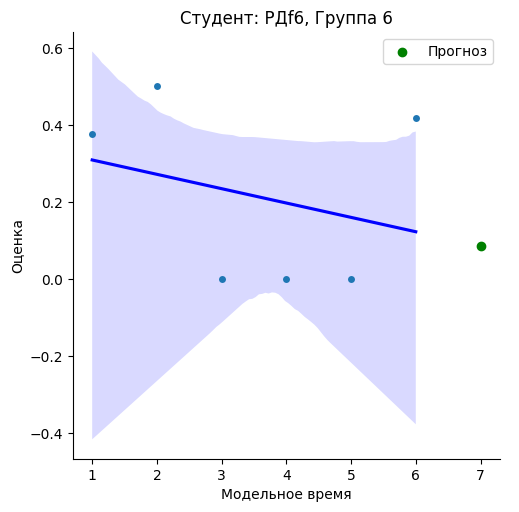

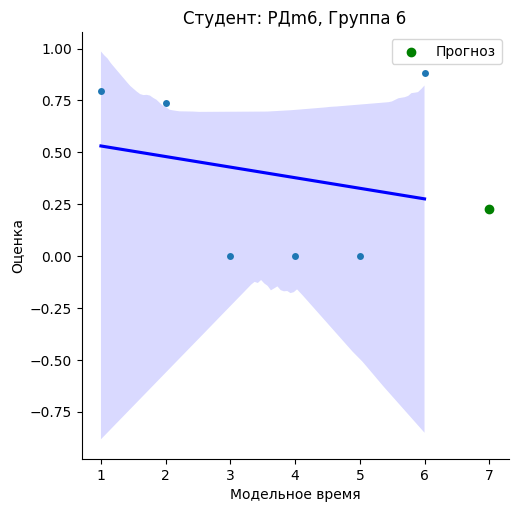

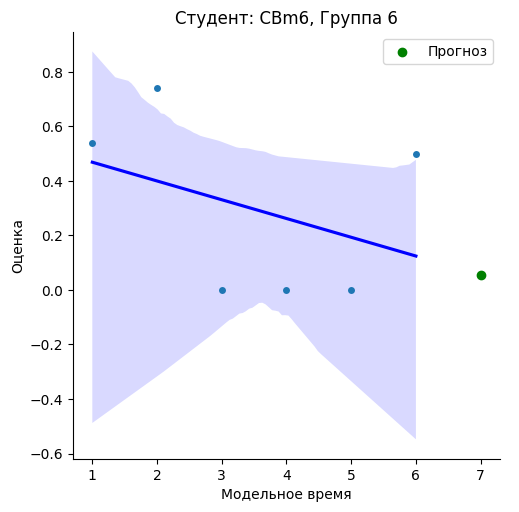

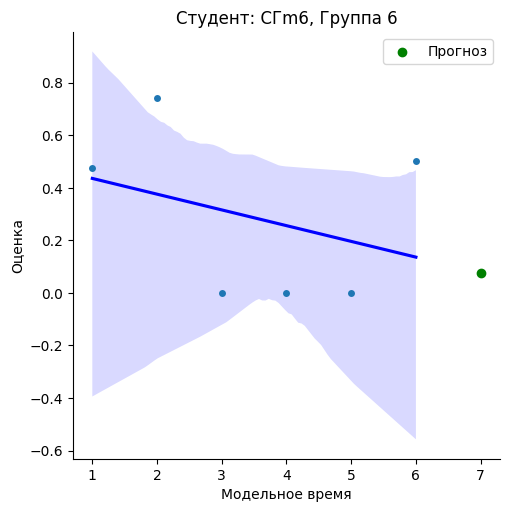

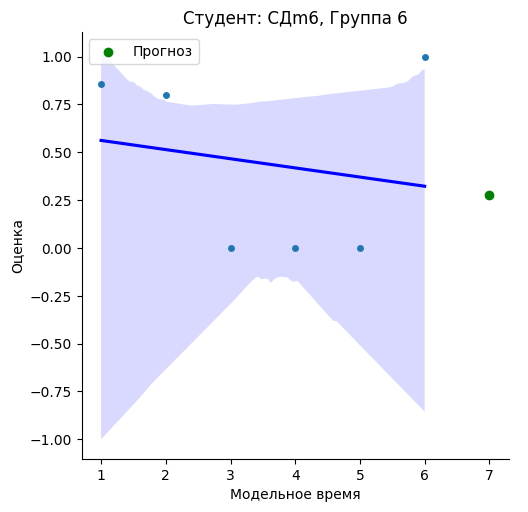

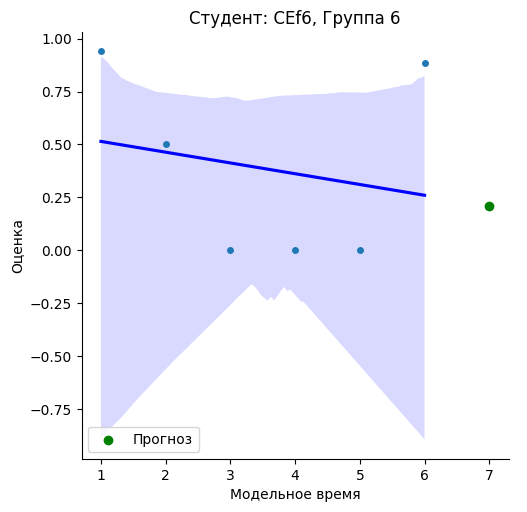

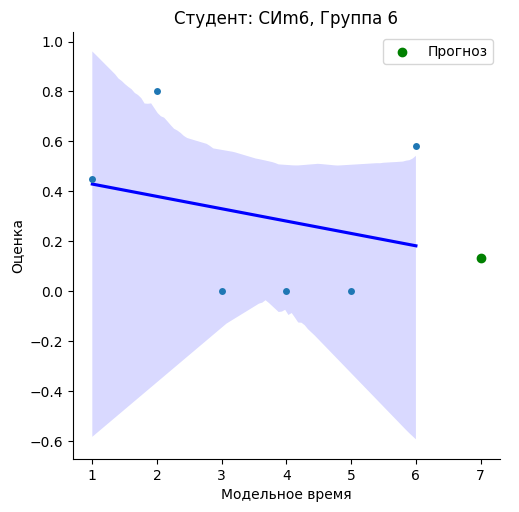

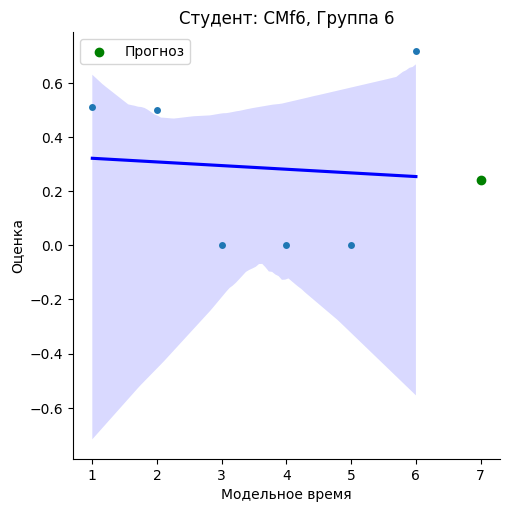

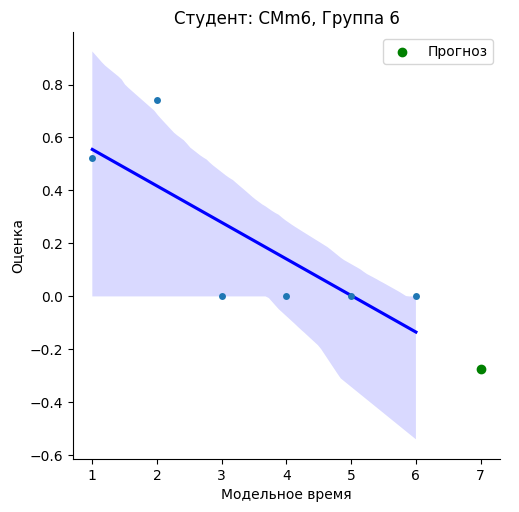

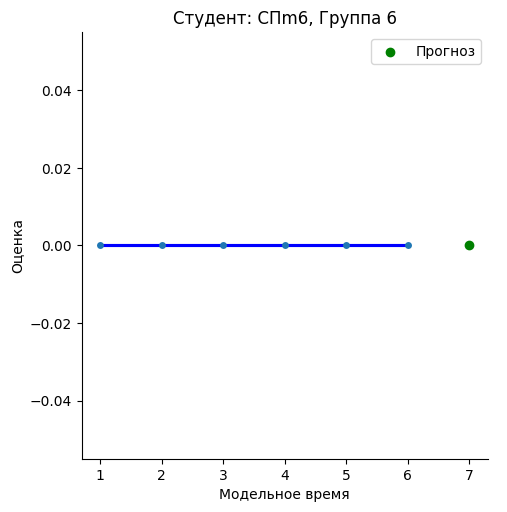

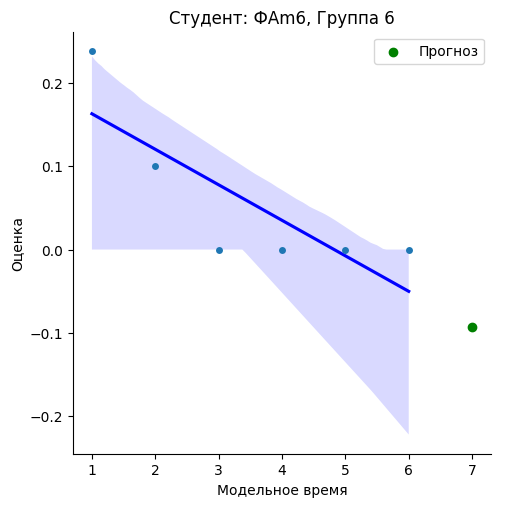

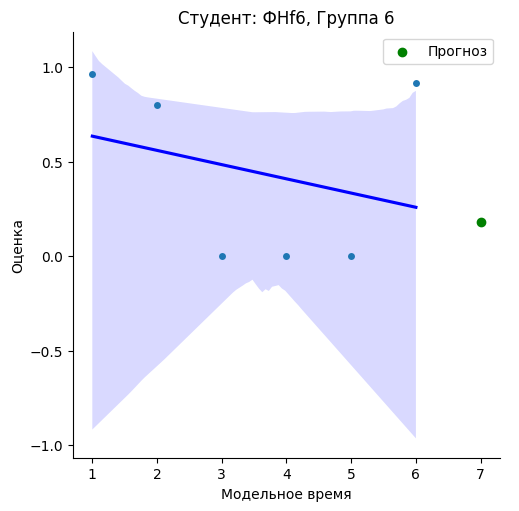

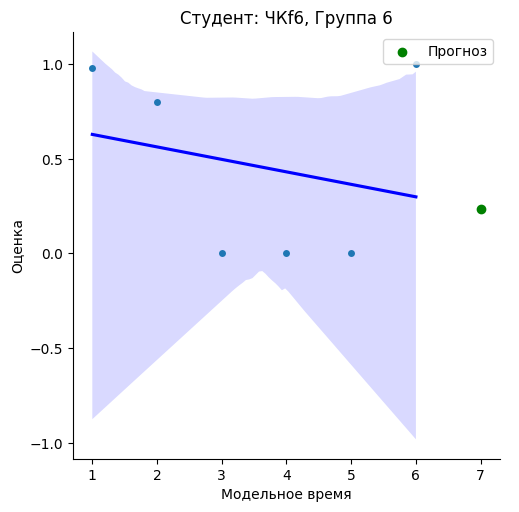

In [35]:
grouped = melted.groupby(['Индекс','Группа'])
intercept_values = []
# Initialize an empty dataframe to store the forecasts
forecasts = pd.DataFrame(columns=melted.columns)
for name, group in grouped:
    # Prepare the data for linear regression
    X = group[['Модельное время']].values  # Independent variable
    y = group['Оценка'].values  # Dependent variable

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Make a forecast for a future passing time (e.g., 7th passing time value)
    future_passing_time = 7
    future_passing_time_as_array = [[future_passing_time]]  # Reshape the value as a 2D array for prediction
    forecasted_score = model.predict(future_passing_time_as_array)

    if name[1] == 6:  # Check if the Group is 6
    # Create a catplot to display categorical data as bars with the regression line
      catplot = sns.catplot(data=group, x='Модельное время', y='Оценка', native_scale=True, zorder=3)
      ax = catplot.ax
      ax.scatter(x=future_passing_time, y=forecasted_score, color='g', label='Прогноз')

    # Create a regplot to display the regression line
      regplot = sns.regplot(data=group, x='Модельное время', y='Оценка', scatter=False, color='b')

      plt.title(f'Студент: {name[0]}, Группа {name[1]}')  # Set title of the plot with student and group information
      plt.xlabel('Модельное время')
      plt.ylabel('Оценка')
      plt.legend()
      plt.show()

    # Store the group name, intercept value, and coefficients in the list
      intercept_values.append((name, model.intercept_, model.coef_[0], r_squared))

# Кластеризация траекторий обучения DB-Scan

In [36]:
dfrm_normalized.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 84 entries, ('ВДm5', 5) to ('ЧКf6', 6)
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ДЗ 1                       84 non-null     float64
 1   Программирование 1         84 non-null     float64
 2   Активность 1               84 non-null     float64
 3   Контрольная 1              84 non-null     float64
 4   Проект 1                   84 non-null     float64
 5   Доп.задание 1              84 non-null     float64
 6   Аттестация 1               84 non-null     float64
 7   ДЗ 2                       84 non-null     float64
 8   Программирование 2         84 non-null     float64
 9   Активность 2               84 non-null     float64
 10  Контрольная 2              84 non-null     float64
 11  Доп.задание 2              84 non-null     float64
 12  ДЗ вне срока               84 non-null     float64
 13  Аттестация 2               84 non

In [37]:
# Select the features for clustering

features = ['ДЗ_прогресс','Программирование_прогресс','Активность_прогресс','Контрольная_прогресс','Доп.задание_прогресс','Аттестация_прогресс']
X = dfrm_normalized[features]

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You may need to adjust the parameters (eps and min_samples) based on your data
clusters = dbscan.fit_predict(X)

# Add the cluster labels to the original dataframe
dfrm_normalized['Кластер'] = clusters

# Explore the clusters
cluster_counts = dfrm_normalized['Кластер'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
 0    70
-1     9
 1     5
Name: Кластер, dtype: int64


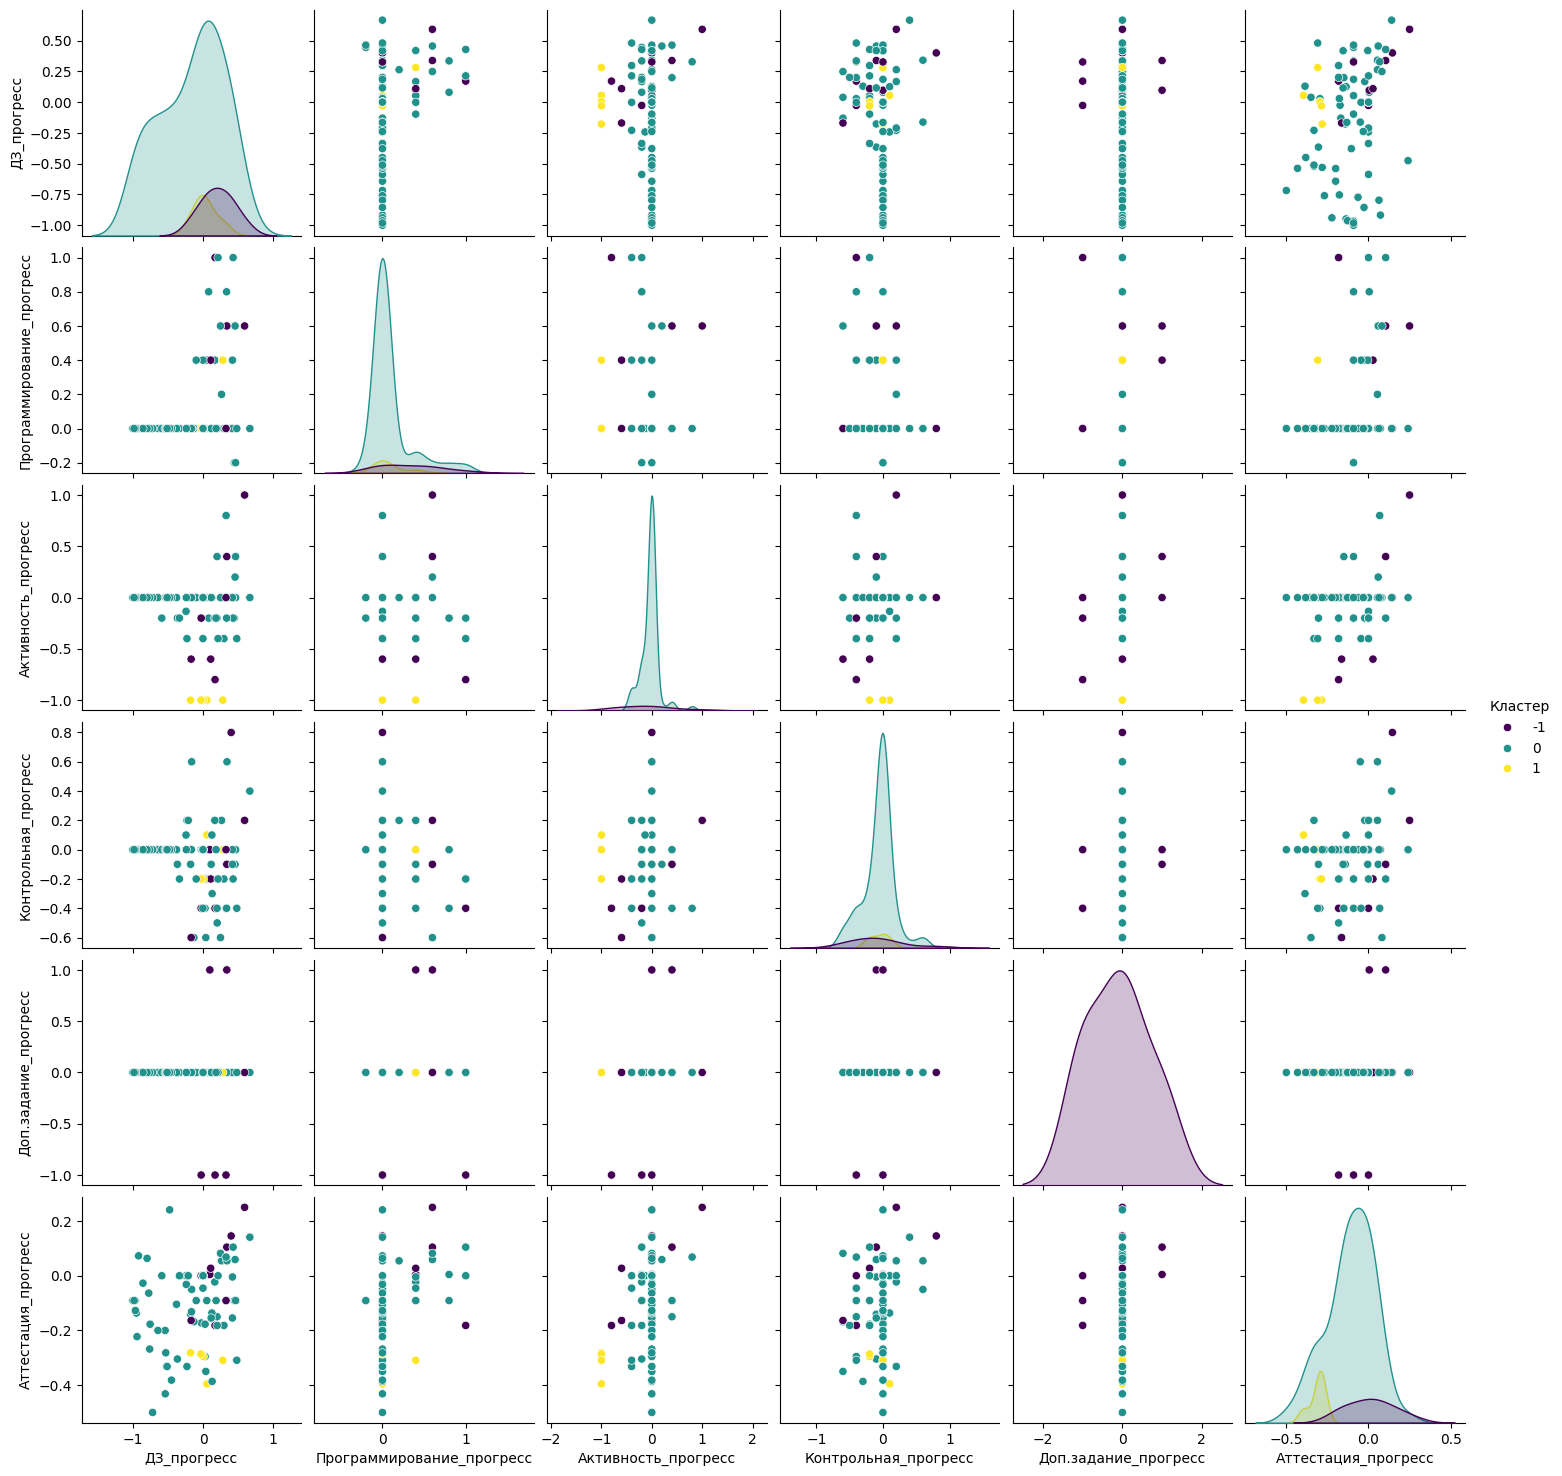

In [38]:
# Select the features for visualization and clustering
features = ['ДЗ_прогресс','Программирование_прогресс','Активность_прогресс','Контрольная_прогресс','Доп.задание_прогресс','Аттестация_прогресс']

# Create a pairplot with hue based on cluster labels
sns.pairplot(dfrm_normalized, vars=features, hue='Кластер', palette='viridis')
plt.show()

In [39]:
# Selecting the features for visualization and clustering
features = ['ДЗ_прогресс','Программирование_прогресс','Активность_прогресс','Контрольная_прогресс','Доп.задание_прогресс','Аттестация_прогресс']

# Get all possible combinations of 3 features
feature_combinations = list(combinations(features, 3))

# Iterate through each feature triplet and create a 3D scatter plot
for features_triplet in feature_combinations:
    fig = px.scatter_3d(dfrm_normalized, x=features_triplet[0], y=features_triplet[1], z=features_triplet[2], color='Кластер', text=dfrm_normalized.index.get_level_values('Индекс').astype(str))

    # Update layout for better visualization
    fig.update_layout(margin=dict(l=0, r=1, b=0, t=0))
    fig.show()